### Languages Project

Проєкт виконаний на основі даних з World Atlas of Language Structures (WALS), основною метою є дослідження мов світу і їх походження.

Примітка: одна з візуалізацій не відображається у html файлі і при перегляді на github. Щоб побачити її потрібно запустити код.

#### Підготовка даних

In [91]:
import pandas as pd
import altair as alt
import geopandas as gpd
import circlify
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from IPython.html import widgets
from IPython.display import display

In [92]:
languages_main = gpd.read_file('language.csv')
languages_main.head()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,geometry
0,aab,,,Arapesh (Abu),-3.45,142.95,Kombio-Arapesh,Torricelli,,PG,...,,,,,,,,,,None
1,aar,aiw,aari1239,Aari,6.0,36.5833333333,South Omotic,Afro-Asiatic,Africa,ET,...,,,,,,,,,,None
2,aba,aau,abau1245,Abau,-4.0,141.25,Upper Sepik,Sepik,Papunesia,PG,...,,,,,,,,,,None
3,abb,shu,chad1249,Arabic (Abbéché Chad),13.8333333333,20.8333333333,Semitic,Afro-Asiatic,Africa,TD,...,,,,,,,,,,None
4,abd,abi,abid1235,Abidji,5.66666666667,-4.58333333333,Kwa,Niger-Congo,Africa,CI,...,,,,,,,,,,None


In [93]:
data = {'language_name': languages_main["Name"],
        'country_code': languages_main["countrycodes"],
        'latitude': languages_main['latitude'],
        'longitude': languages_main['longitude']
        }

languages_map = pd.DataFrame(data)
languages_map.head()

,language_name,country_code,latitude,longitude
0,Arapesh (Abu),PG,-3.45,142.95
1,Aari,ET,6.0,36.5833333333
2,Abau,PG,-4.0,141.25
3,Arabic (Abbéché Chad),TD,13.8333333333,20.8333333333
4,Abidji,CI,5.66666666667,-4.58333333333


In [94]:
language_name = ['Arapesh (Abu)']
country_code = ['PG']
latitude = -3.45
longitude = 142.95
            
data = {'language_name': language_name,
         'country_code': country_code,
         'latitude': latitude,
         'longitude': longitude
        }

language_map_df = pd.DataFrame(data)

def split_coutry_codes(cd, lng, lat, lon, language_map_df):
    codes_list = cd.split(' ')
    for el in codes_list:
        dct = {'language_name': lng, 'country_code': el, 'latitude': lat, 'longitude': lon}
        language_map_df = language_map_df.append(dct, ignore_index = True)
    return language_map_df

for index, row in languages_map.iterrows():
    language_map_df = split_coutry_codes(row["country_code"], row["language_name"], row['latitude'], row['longitude'], language_map_df)
    
language_map_df.head()

,language_name,country_code,latitude,longitude
0,Arapesh (Abu),PG,-3.45,142.95
1,Arapesh (Abu),PG,-3.45,142.95
2,Aari,ET,6.0,36.5833333333
3,Abau,PG,-4.0,141.25
4,Arabic (Abbéché Chad),TD,13.8333333333,20.8333333333


In [95]:
world = gpd.read_file('world-countries.json')
world.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [96]:
codes = gpd.read_file('country-codes.csv')
codes.drop(['geometry', 'numeric', 'country'], axis = 1, inplace = True)
codes = codes.rename(columns = {'alpha3': 'id', 'alpha2': 'country_code'}, inplace = False)
codes.head()

,country_code,id
0,AF,AFG
1,AL,ALB
2,DZ,DZA
3,AS,ASM
4,AD,AND


In [97]:
merged_codes = language_map_df.merge(codes)
merged_codes.head()

,language_name,country_code,latitude,longitude,id
0,Arapesh (Abu),PG,-3.45,142.95,PNG
1,Arapesh (Abu),PG,-3.45,142.95,PNG
2,Abau,PG,-4.0,141.25,PNG
3,Adzera,PG,-6.25,146.25,PNG
4,Agarabi,PG,-6.16666666667,146.0,PNG


In [98]:
df_language_country = world.merge(merged_codes)
df_language_country.head()

,id,name,geometry,language_name,country_code,latitude,longitude
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Baluchi,AF,28.0,62.0
1,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Dari,AF,35.0,66.0
2,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Ishkashmi,AF,37.0,72.0
3,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Kati (in Afghanistan),AF,35.5,70.0
4,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Moghol,AF,35.0,62.0


In [99]:
data2 = {'language_name': languages_main["Name"],
        'language_family': languages_main["family"],
        'language_genus': languages_main["genus"],
         'macroarea': languages_main["macroarea"]
        }

languages_background_full = pd.DataFrame(data2)

#### Візуалізації

In [100]:
df_language_country= df_language_country.replace('//Ani', 'ǁAni')
df_language_country= df_language_country.replace('/Xam', 'ǀXam')
df_language_country= df_language_country.replace('=|Hoan', 'Juǀʼhoan')
df_language_country = df_language_country.sort_values('language_name')
languages = df_language_country.language_name.unique().tolist()
languages.insert(0,"All")
df_language_country.head()

,id,name,geometry,language_name,country_code,latitude,longitude
1780,NAM,Namibia,"POLYGON ((16.34498 -28.57671, 15.60182 -27.821...",!Xun (Ekoka),NA,-19.6666666667,18.0
21,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",!Xun (Ekoka),AO,-19.6666666667,18.0
429,BWA,Botswana,"POLYGON ((25.64916 -18.53603, 25.85039 -18.714...",!Xóõ,BW,-24.0,21.5
2472,SLB,Solomon Islands,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865...",'Are'are,SB,-9.25,161.166666667
1269,IND,India,"POLYGON ((77.83745 35.49401, 78.91227 34.32194...",A-Pucikwar,IN,12.1666666667,92.8333333333


In [119]:
def visualize(language):
    if (language == "All"):
        df_eng = df_language_country
        curr_title = 'All Languages Map'
    else:
        df_eng = df_language_country[df_language_country.language_name == scW.value]
        curr_title = language + ' Language Map'
    map_countries = alt.Chart(world).transform_lookup(lookup = 'name',
    from_ = alt.LookupData(data = df_eng, 
                               key = 'name',
                               fields=['language_name', 'name']
    )
    ).project(type = 'equalEarth'
    ).mark_geoshape(stroke = 'black', strokeWidth = 0.3).encode(

        color = alt.condition(
            "datum.language_name",
            alt.value('#6aa84f'),
            alt.value('#e6e5e5')
        ),
    ).properties(width = 930, height = 500)
    
    map_countries_names = alt.Chart(world).project(type = 'equalEarth'
    ).mark_geoshape(stroke = 'black', strokeWidth = 0.3, opacity=0.0).encode(
        tooltip = [
            alt.Tooltip('name:N', title="country"),
        ]
    ).properties(width = 930, height = 500)
    
    map_points = alt.Chart(df_eng).mark_circle(size=50, opacity=1, stroke ='black', strokeWidth=1).encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.value('red'),
        tooltip = [
            alt.Tooltip('language_name:N', title="origin of"),
        ]
    )
    
    display((map_countries + map_countries_names + map_points).properties(width = 930, height = 500, 
                 background = '#f9f9ff', 
                 padding = 25,
                 title = alt.TitleParams(
                           text = curr_title,
                           subtitle = 'Green colour indicates the countries were selected language is used and can be found, the red dot marks the exact location of language origin.'),
                ).configure_title(anchor = 'middle',
                  frame = 'group',
                  fontSize = 19,
                  offset = 20,
                  subtitleFontSize = 13))



scW = widgets.Dropdown(options=languages)

i = widgets.interactive(visualize, language=scW)


display(i)


interactive(children=(Dropdown(description='language', options=('All', '!Xun (Ekoka)', '!Xóõ', "'Are'are", 'A-…

Головне завдання даної візуалізації полягає в тому, щоб окреслити територію поширення/вискористання мов, а також їх місце походження. За допомогою селектора можна обрати конкретну мову, яка цікавить і подивитися країни, на які ця мова поширилася, а також точку її походження. За замовчуванням селектор стоїть на значенні All - що показує карту всіх мов світу, з локаціями їх зародження.

Я також розглядала варіант без селектора - такий, як зараз відображається при значенні All, але в такому випадку було б важко(або і неможливо) подивитись на поширення однієї конкретної мови, яка цікавить. Саме тому я вирішила додати ще селектор.
Окрім цього я думала показувати лише країни поширення мови, але за рахунок наявності маленьких країн і островів, багато мов було важко ідентифікувати на карті. А коли мова поширеня більше ніж в одній країні було незрозуміло, де саме вона зародилась, а куди згодом поширилась. Тому я також додала на карту локацію - місце походження кожної мови, щоб вирішити ці проблеми.

Саме в можливості поглянути і на країни поширення, і на точку походження, я вважаю перевагую даної візуалізації. Так само, як наявність селектора - можливість зосередитись і отримати інформацію лише про мову, яка цікавить, без лишньої інформації про інші мови.

In [102]:
data3 = {'language_name': languages_main["Name"],
        'language_family': languages_main["family"],
        'language_genus': languages_main["genus"],
         'macroarea': languages_main["macroarea"]
        }


languages_areas = pd.DataFrame(data3)
languages_areas

,language_name,language_family,language_genus,macroarea
0,Arapesh (Abu),Torricelli,Kombio-Arapesh,
1,Aari,Afro-Asiatic,South Omotic,Africa
2,Abau,Sepik,Upper Sepik,Papunesia
3,Arabic (Abbéché Chad),Afro-Asiatic,Semitic,Africa
4,Abidji,Niger-Congo,Kwa,Africa
...,...,...,...,...
2674,Zapotec (Texmelucan),Oto-Manguean,Zapotecan,North America
2675,Zulu,Niger-Congo,Bantoid,Africa
2676,Zuni,Zuni,Zuni,North America
2677,Zapotec (Yatzachi),Oto-Manguean,Zapotecan,North America


In [103]:
languages_areas_EA = languages_areas[languages_areas.macroarea == 'Eurasia']
ea = languages_areas_EA.language_family.nunique()
ea_f_list = languages_areas_EA['language_family'].unique()

languages_areas_A = languages_areas[languages_areas.macroarea == 'Africa']
a = languages_areas_A.language_family.nunique()
a_f_list = languages_areas_A['language_family'].unique()

languages_areas_AU = languages_areas[languages_areas.macroarea == 'Australia']
au = languages_areas_AU.language_family.nunique()
au_f_list = languages_areas_AU['language_family'].unique()

languages_areas_NA = languages_areas[languages_areas.macroarea == 'North America']
na = languages_areas_NA.language_family.nunique()
na_f_list = languages_areas_NA['language_family'].unique()

languages_areas_P = languages_areas[languages_areas.macroarea == 'Papunesia']
p = languages_areas_P.language_family.nunique()
p_f_list = languages_areas_P['language_family'].unique()

languages_areas_SA = languages_areas[languages_areas.macroarea == 'South America']
sa = languages_areas_SA.language_family.nunique()
sa_f_list = languages_areas_SA['language_family'].unique()

areas = ['Eurasia', 'Africa', 'Australia', 'North America', 'South America', 'Papunesia']
amount = [ea, a, au, na, sa, p]
data_fam = {'macroarea': areas,
         'amount_of_lang_fam': amount
        }

background_fam = pd.DataFrame(data_fam)
background_fam

,macroarea,amount_of_lang_fam
0,Eurasia,30
1,Africa,28
2,Australia,23
3,North America,51
4,South America,78
5,Papunesia,57


In [104]:

ea_l = languages_areas_EA.language_name.nunique()
ea_l_list = languages_areas_EA['language_name'].unique()

a_l = languages_areas_A.language_name.nunique()
a_l_list = languages_areas_A['language_name'].unique()

au_l = languages_areas_AU.language_name.nunique()
au_l_list = languages_areas_AU['language_name'].unique()

na_l = languages_areas_NA.language_name.nunique()
na_l_list = languages_areas_NA['language_name'].unique()

p_l = languages_areas_P.language_name.nunique()
p_l_list = languages_areas_P['language_name'].unique()

sa_l = languages_areas_SA.language_name.nunique()
sa_l_list = languages_areas_SA['language_name'].unique()

amount_l = [ea_l, a_l, au_l, na_l, sa_l, p_l]
data_lang = {'macroarea': areas,
         'amount_of_lang': amount_l
        }

background_language = pd.DataFrame(data_lang)
background_language

,macroarea,amount_of_lang
0,Eurasia,660
1,Africa,607
2,Australia,177
3,North America,397
4,South America,257
5,Papunesia,558


In [105]:
ea_g = languages_areas_EA.language_genus.nunique()
ea_g_list = languages_areas_EA['language_genus'].unique()

a_g = languages_areas_A.language_genus.nunique()
a_g_list = languages_areas_A['language_genus'].unique()

au_g = languages_areas_AU.language_genus.nunique()
au_g_list = languages_areas_AU['language_genus'].unique()

na_g = languages_areas_NA.language_genus.nunique()
na_g_list = languages_areas_NA['language_genus'].unique()

p_g = languages_areas_P.language_genus.nunique()
p_g_list = languages_areas_P['language_genus'].unique()

sa_g = languages_areas_SA.language_genus.nunique()
sa_g_list = languages_areas_SA['language_genus'].unique()

amount_g = [ea_g, a_g, au_g, na_g, sa_g, p_g]
data_genus = {'macroarea': areas,
         'amount_of_lang_genus': amount_g
        }

background_genus = pd.DataFrame(data_genus)
background_genus

,macroarea,amount_of_lang_genus
0,Eurasia,87
1,Africa,81
2,Australia,43
3,North America,102
4,South America,106
5,Papunesia,139


In [106]:
background_fam_chart = alt.Chart(background_fam).mark_bar(color='#369B10').encode(
    y = alt.Y('macroarea:N', 
              sort = alt.Sort(field = 'amount_of_lang_fam',  order = 'descending'),
              axis=alt.Axis(title='')),
    x = alt.X('amount_of_lang_fam:Q',
              axis=alt.Axis(title='Number of language families')),
).properties(width = 700, 
             height = 300)


In [107]:
background_genus_chart = alt.Chart(background_genus).mark_bar(color='#206DAE').encode(
    y = alt.Y('macroarea:N', 
              sort = alt.Sort(field = 'amount_of_lang_genus',  order = 'descending'),
              axis=alt.Axis(title='')),
    x = alt.X('amount_of_lang_genus:Q', 
              axis=alt.Axis(title='Number of language genuses')),
).properties(width = 700, height = 300)

In [108]:
background_lang_chart = alt.Chart(background_language).mark_bar(color='#DA2894').encode(
    y = alt.Y('macroarea:N', 
              sort = alt.Sort(field = 'amount_of_lang',  order = 'descending'),
              axis=alt.Axis(title='')),
    x = alt.X('amount_of_lang:Q',
              axis=alt.Axis(title='Number of languages')),
).properties(width = 700, height = 300)

In [109]:
alt.vconcat(background_lang_chart, 
            background_fam_chart,
            background_genus_chart,
            spacing=70
           ).properties(background = '#F9F9F9',
                       title = alt.TitleParams(
                           text = 'Comparison of macroareas',
                        subtitle = 'Based on the amount of languages, language families and genuses'),
                       padding = 30
           ).configure_title(anchor = 'middle',
                  frame = 'group',
                  fontSize = 20,
                  offset = 30,
                  subtitleFontSize = 14
).configure_axisX(titlePadding=15,
)

alt.VConcatChart(...)

Головне завдання даної візуалізації - порівняти мовний аспект у макротериторіях.

Потрійна візуалізація - порівняння по кількості мов, кількості мовних сімей і кількості мовних родів. За допомогою цієї візуалізації можна також побачити, що кількість мовних сімей не пропорційна кількості мов на макротериторії. Тобто, що з однієї мовної сім'ї можуть виходити багато мов. Такий патерн найкраще проглядається по Євразії(що і не дивно, згодом на наступних візуалізаціях можна буде побачити скільки мов виходять з найпопулярніших мовних сімей/родів).

Як альтернативу даній візуалізації я розглядала Circular packing діаграму. У ній також можна було б перелічити усі мови/сім'ї/роди на певній території, але гірше б проглядалась, яка саме відмінність(в цифрах і відношенні один до одного) між макротериторіями. А перелік мов, при поганому виконанні Circular packing міг б стати візуалним шумом. Тому я зупинилась на даній візуалізації.

Його перевагами є легке порівняння макротериторій між собою у кожному з аспектів, очевидність позиції кожної макротериторіх(1 по кількості мов, 3 по кількості мов і тд).


In [110]:
Australia = set(au_g_list.flatten())
Eurasia = set(ea_g_list.flatten())
Africa = set(a_g_list.flatten())
South_America = set(sa_g_list.flatten())
North_America = set(na_g_list.flatten())
Papunesia = set(p_g_list.flatten())


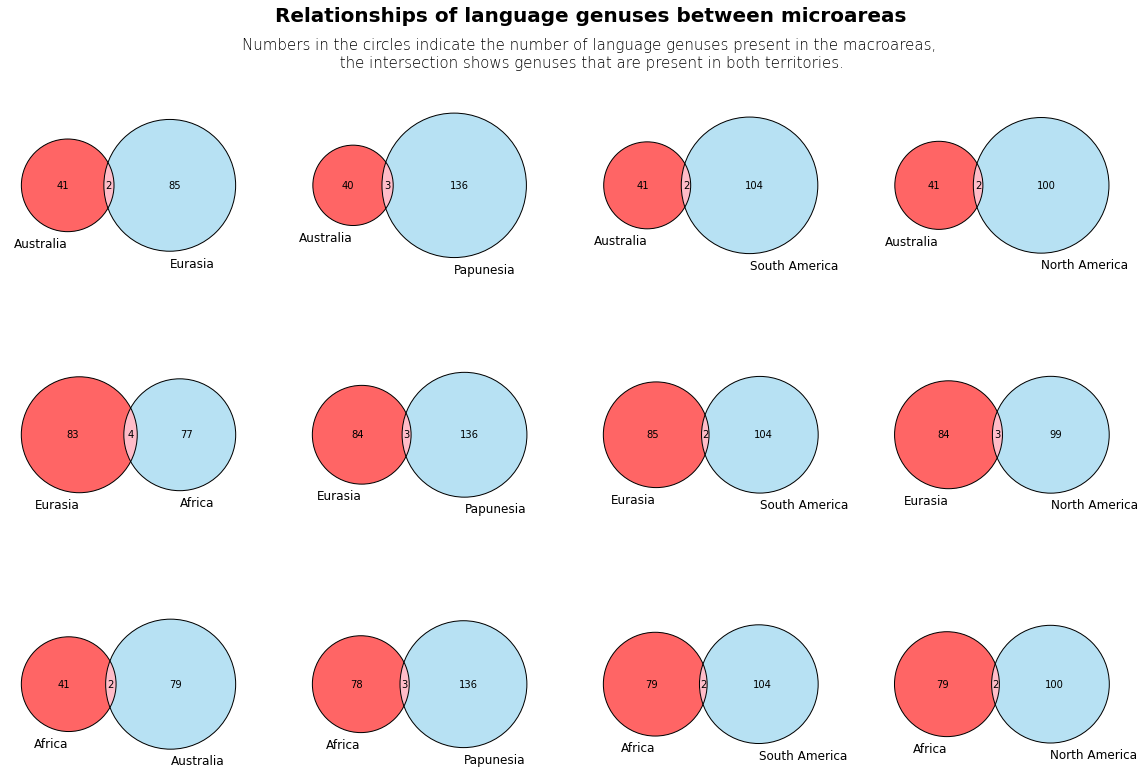

In [111]:

figure, axes = plt.subplots(3, 4, figsize=(20,13))

plt.title('Numbers in the circles indicate the number of language genuses present in the macroareas,\n the intersection shows genuses that are present in both territories.', fontsize=15, weight = 'light', y=4.7, x=-1.2)
figure.suptitle('Relationships of language genuses between microareas', fontsize=20, weight='semibold', x=0.53, y=0.96)


v1 = venn2([Australia, Eurasia], set_labels = ('Australia', 'Eurasia'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[0][0])
vv1 = venn2_circles([Australia, Eurasia], linewidth=1, color='k',  ax=axes[0][0]);

v5 = venn2([Australia, Papunesia], set_labels = ('Australia', 'Papunesia'), ax=axes[0][1], set_colors=('red', 'skyblue'), alpha = 0.6)
vv5 = venn2_circles([Australia, Papunesia],  linewidth=1, color='k',  ax=axes[0][1]);

v3 = venn2([Australia, South_America], set_labels = ('Australia', 'South America'), set_colors=('red', 'skyblue'), alpha = 0.6,ax=axes[0][2])
vv3 = venn2_circles([Australia, South_America],  linewidth=1, color='k',  ax=axes[0][2]);

v4 = venn2([Australia, North_America], set_labels = ('Australia', 'North America'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[0][3])
vv4 = venn2_circles([Australia, North_America], linewidth=1, color='k',  ax=axes[0][3]);

v6 = venn2([Eurasia, Africa], set_labels = ('Eurasia', 'Africa'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[1][0])
vv6 = venn2_circles([Eurasia, Africa],  linewidth=1, color='k',  ax=axes[1][0]);

v9 = venn2([Eurasia, Papunesia], set_labels = ('Eurasia', 'Papunesia'),  set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[1][1])
vv9 = venn2_circles([Eurasia, Papunesia], linewidth=1, color='k',  ax=axes[1][1]);

v7 = venn2([Eurasia, South_America], set_labels = ('Eurasia', 'South America'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[1][2])
vv7 = venn2_circles([Eurasia, South_America],  linewidth=1, color='k',  ax=axes[1][2]);

v8 = venn2([Eurasia, North_America], set_labels = ('Eurasia', 'North America'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[1][3])
vv8 = venn2_circles([Eurasia, North_America],  linewidth=1, color='k',  ax=axes[1][3]);

v2 = venn2([Australia, Africa], set_labels = ('Africa', 'Australia'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[2][0])
vv2 = venn2_circles([Australia, Africa], linewidth=1, color='k',  ax=axes[2][0]);

v12 = venn2([Africa, Papunesia], set_labels = ('Africa', 'Papunesia'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[2][1])
vv12 = venn2_circles([Africa, Papunesia],  linewidth=1, color='k',  ax=axes[2][1]);

v10 = venn2([Africa, South_America], set_labels = ('Africa', 'South America'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[2][2])
vv10 = venn2_circles([Africa, South_America],  linewidth=1, color='k',  ax=axes[2][2]);

v11 = venn2([Africa, North_America], set_labels = ('Africa', 'North America'), set_colors=('red', 'skyblue'), alpha = 0.6, ax=axes[2][3])
vv11 = venn2_circles([Africa, North_America], linewidth=1, color='k',  ax=axes[2][3]);

plt.show()

Завдання даної візуалізації - подивитись на походження і розповсюдження мовних родин/родів, щоб зрозуміти наскільки мовний рід росходиться за межами своєї певної території. Тобто якщо "джерелом" мовного роду є Африка, то наскільки через різні причини(велике переселення народів, міграції і тд) цей рід розповсюдився на інші території.

З цієї візуалізації можна побачити, що  перетини кіл дуже маленькі, тобто мала кількість мовних родів присутня більше ніж на 1 макротериторії. З цього можна зробити висновок, що більшість родів залишилися на "своїй території". Найбільші перетини з іншими макротериторіями(3-4 роди) має Євразія, що досить логічно, враховуючи, що саме народи, які живуть на цих територіях були найбільш загарбницькими і в свій час робити багато відкриттів нових земель і мали там багато колоній, чим розповсюджували свої мови.

Для вирішення цієї задачі я також пробувала використовувати діаграми Венна з більше ніж 2 кругами(з 3, 4). Але в такому випадку перетини ставали лише меншими і доволі часто становили взагалі 0(наприклад, 2 на перетині Африки-Австралії-Євразії, але 0 на перетині лише Африки-Австралії і лише Африки-Євразії). Такий спосіб візуалізації не додавав ніякої дуже цінної додаткової інофрмації, але одразу ставав незрозумілим і набагато важчим для сприйняття.


In [112]:
languages_background_ea = languages_background_full[languages_background_full.macroarea == 'Eurasia']
languages_background_au = languages_background_full[languages_background_full.macroarea == 'Australia']
languages_background_a = languages_background_full[languages_background_full.macroarea == 'Africa']
languages_background_sa = languages_background_full[languages_background_full.macroarea == 'South America']
languages_background_na = languages_background_full[languages_background_full.macroarea == 'North America']
languages_background_p = languages_background_full[languages_background_full.macroarea == 'Papunesia']
languages_background_p.head()

,language_name,language_family,language_genus,macroarea
2,Abau,Sepik,Upper Sepik,Papunesia
12,Abun,West Papuan,North-Central Bird's Head,Papunesia
13,Abui,Timor-Alor-Pantar,Greater Alor,Papunesia
26,Adang,Timor-Alor-Pantar,Greater Alor,Papunesia
32,Adzera,Austronesian,Oceanic,Papunesia


In [113]:
family_count_ea = languages_background_ea.groupby('language_family').count()
family_count_ea['family'] = family_count_ea.index
family_count_ea['macroarea'] = "Eurasia"

family_count_au = languages_background_au.groupby('language_family').count()
family_count_au['family'] = family_count_au.index
family_count_au['macroarea'] = "Australia"

family_count_a = languages_background_a.groupby('language_family').count()
family_count_a['family'] = family_count_a.index
family_count_a['macroarea'] = "Africa"

family_count_sa = languages_background_sa.groupby('language_family').count()
family_count_sa['family'] = family_count_sa.index
family_count_sa['macroarea'] = "South America"

family_count_na = languages_background_na.groupby('language_family').count()
family_count_na['family'] = family_count_na.index
family_count_na['macroarea'] = "North America"

family_count_p = languages_background_p.groupby('language_family').count()
family_count_p['family'] = family_count_p.index
family_count_p['macroarea'] = "Papunesia"

family_count_ea.drop(['language_genus'], axis = 1, inplace = True)
family_count_au.drop(['language_genus'], axis = 1, inplace = True)
family_count_a.drop(['language_genus'], axis = 1, inplace = True)
family_count_sa.drop(['language_genus'], axis = 1, inplace = True)
family_count_na.drop(['language_genus'], axis = 1, inplace = True)
family_count_p.drop(['language_genus'], axis = 1, inplace = True)

family_count_ea.head()

,language_name,macroarea,family
language_family,,,
Afro-Asiatic,27,Eurasia,Afro-Asiatic
Ainu,1,Eurasia,Ainu
Altaic,64,Eurasia,Altaic
Austro-Asiatic,49,Eurasia,Austro-Asiatic
Austronesian,12,Eurasia,Austronesian


In [114]:
frames = [family_count_ea, family_count_au, family_count_a, family_count_sa, family_count_na, family_count_p]

family_count_all = pd.concat(frames)
family_count_all = family_count_all[family_count_all.family != 'other']
family_count_all.head()

,language_name,macroarea,family
language_family,,,
Afro-Asiatic,27,Eurasia,Afro-Asiatic
Ainu,1,Eurasia,Ainu
Altaic,64,Eurasia,Altaic
Austro-Asiatic,49,Eurasia,Austro-Asiatic
Austronesian,12,Eurasia,Austronesian


In [115]:
gen_count_ea = languages_background_ea.groupby('language_genus').count()
gen_count_ea['genus'] = gen_count_ea.index
gen_count_ea['macroarea'] = "Eurasia"

gen_count_au = languages_background_au.groupby('language_genus').count()
gen_count_au['genus'] = gen_count_au.index
gen_count_au['macroarea'] = "Australia"

gen_count_a = languages_background_a.groupby('language_genus').count()
gen_count_a['genus'] = gen_count_a.index
gen_count_a['macroarea'] = "Africa"

gen_count_sa = languages_background_sa.groupby('language_genus').count()
gen_count_sa['genus'] = gen_count_sa.index
gen_count_sa['macroarea'] = "South America"

gen_count_na = languages_background_na.groupby('language_genus').count()
gen_count_na['genus'] = gen_count_na.index
gen_count_na['macroarea'] = "North America"

gen_count_p = languages_background_p.groupby('language_genus').count()
gen_count_p['genus'] = gen_count_p.index
gen_count_p['macroarea'] = "Papunesia"

gen_count_ea.drop(['language_family'], axis = 1, inplace = True)
gen_count_au.drop(['language_family'], axis = 1, inplace = True)
gen_count_a.drop(['language_family'], axis = 1, inplace = True)
gen_count_sa.drop(['language_family'], axis = 1, inplace = True)
gen_count_na.drop(['language_family'], axis = 1, inplace = True)
gen_count_p.drop(['language_family'], axis = 1, inplace = True)

gen_count_ea.head()

,language_name,macroarea,genus
language_genus,,,
Ainu,1,Eurasia,Ainu
Albanian,1,Eurasia,Albanian
Armenian,3,Eurasia,Armenian
Aslian,5,Eurasia,Aslian
Avar-Andic-Tsezic,13,Eurasia,Avar-Andic-Tsezic


In [116]:
frames = [gen_count_ea, gen_count_au, gen_count_a, gen_count_sa, gen_count_na, gen_count_p]

gen_count_all = pd.concat(frames)
gen_count_all.head()

,language_name,macroarea,genus
language_genus,,,
Ainu,1,Eurasia,Ainu
Albanian,1,Eurasia,Albanian
Armenian,3,Eurasia,Armenian
Aslian,5,Eurasia,Aslian
Avar-Andic-Tsezic,13,Eurasia,Avar-Andic-Tsezic


In [117]:
dropdown = alt.binding_select(options = family_count_all.macroarea.unique(), name = "Macroarea  ")
select_region = alt.selection_single(empty = 'none', bind = dropdown, fields = ['macroarea'], init={'macroarea': 'Eurasia'})

background_chart_fam = alt.Chart(family_count_all).mark_bar(color='#369B10').encode(
    y = alt.Y('family:N', 
              sort= alt.SortField('language_name', order='descending'),
              axis=alt.Axis(title="")),
    x = alt.X('language_name:Q',
              axis=alt.Axis(title='Number of languages in the family'),
             ),
).properties(width = 700, 
             height = 500,
             background = '#F9F9F9',
             title = alt.TitleParams(
                        text = 'Top 10 most common language families in the macroarea',
                        subtitle = 'According to The World Atlas of Language Structures (WALS)'),
             padding = 30
).configure_title(anchor = 'middle',
                  frame = 'group',
                  fontSize = 20,
                  offset = 30,
                  subtitleFontSize = 14
).configure_axisX(titlePadding=15, 
).add_selection(select_region
).transform_filter(select_region
).transform_window(rank='rank(language_name)',
                   sort=[alt.SortField('language_name', order='descending')]
).transform_filter((alt.datum.rank < 10))

background_chart_fam

alt.Chart(...)

Візуалізація - топ10 найпоширеніших мовних родин на макротериторії. Основне завдання - продемонструвати найбільш використовувані мовні родинини в залежності від території.
Вона також показує кількість мов, які входять до цієї родини на обраній території(що, як я згадувала раніше,показує, що з однієї мовної сім'ї можуть виходити багато мов). 

Я також роглядала варіант показувати не лише топ10, а весь рейтинг усіх наявних на макротериторії родин, але їх дуже багато(на деяких територіях понад 100) і більшість із них важко навіть помітити порівнюючи з родинами, які в топі. Тому, щоб справді показати найпоширеніші родини і сконцентрувати увагу на них, я вирішила робити лише рейтинг топ10.
Також як альтернативу даній візуалізації я розглядала Pie Chart. Недоліком, який я знайшла, через який все ж вирішила не використовувати  Pie Chart - це те, що у деяких територій(наприклад Papunesia) одразу декілька родин є набагато меншими ніж лідери і на Pie Chart в порівнянні з першими двома родинами їх важко розрізнити.

In [118]:
dropdown = alt.binding_select(options = gen_count_all.macroarea.unique(), name = "Macroarea  ")
select_region = alt.selection_single(empty = 'none', bind = dropdown, fields = ['macroarea'], init={'macroarea': 'Eurasia'})

background_chart_gen = alt.Chart(gen_count_all).mark_bar(color='#DA2894').encode(
    y = alt.Y('genus:N',
              sort= alt.SortField('language_name', order='descending'),
              axis=alt.Axis(title="")),
    x = alt.X('language_name',
               axis=alt.Axis(title='Number of languages in the family'),),
).properties(width = 700, 
             height = 500, 
             background = '#F9F9F9',
             title = alt.TitleParams(
                        text = 'Top 10 most common language genuses in the macroarea',
                        subtitle = 'According to The World Atlas of Language Structures (WALS)'),
             padding =  {"left": 68, "top": 30, "right": 30, "bottom": 30} 
).configure_title(anchor = 'middle',
                  frame = 'group',
                  fontSize = 20,
                  offset = 30,
                  subtitleFontSize = 14
).configure_axisX(titlePadding=15,
).add_selection(select_region
).transform_filter(select_region
).transform_window(rank='rank(language_name)',
                   sort=[alt.SortField('language_name', order='descending')]
).transform_filter((alt.datum.rank < 10))

background_chart_gen

alt.Chart(...)

Візуалізація - топ10 найпоширеніших мовних родів на макротериторії. Основне завдання - продемонструвати найбільш використовувані мовні роди в залежності від території.
Вона також показує кількість мов, які входять до цього роду на обраній території.

Загалом за ідеєю і поданням ця візуалізація ідентична до минулої, але працює і показує іншу інформацію/дані. Тому альтернативні способи вирішення і недоліки/переваги, я вже описала раніше(такі ж, як і в минулій візуалізації).